In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv3D, MaxPooling3D,Conv2D,AveragePooling2D,AveragePooling3D
from keras.layers import Dense, GlobalAveragePooling3D,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, Adadelta
from keras.utils import np_utils, generic_utils
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional_recurrent import ConvLSTM2D

import theano
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# image specification
img_rows,img_cols=64,64

# Training data

X_tr=[]           # variable to store entire dataset

In [3]:
'''
import os
from tqdm import tqdm
ls_path_10 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/")
listing_10 = os.listdir(ls_path_10)
for ls_1 in listing_10:
    ls_path_11 = os.path.join(ls_path_10,ls_1)
    listing_11 = os.listdir(ls_path_11)
    for ls in tqdm(listing_11):
        listing_stop_10 = os.listdir(os.path.join(ls_path_11,ls)) 
        #print(ls)
        img_depth = len(listing_stop_10)
        if img_depth < 20:
            print(img_depth)
            print(ls)
'''

'\nimport os\nfrom tqdm import tqdm\nls_path_10 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/")\nlisting_10 = os.listdir(ls_path_10)\nfor ls_1 in listing_10:\n    ls_path_11 = os.path.join(ls_path_10,ls_1)\n    listing_11 = os.listdir(ls_path_11)\n    for ls in tqdm(listing_11):\n        listing_stop_10 = os.listdir(os.path.join(ls_path_11,ls)) \n        #print(ls)\n        img_depth = len(listing_stop_10)\n        if img_depth < 20:\n            print(img_depth)\n            print(ls)\n'

In [4]:
from tqdm import tqdm

ls_path = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/Rolling Hand Backward")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    #print(ls)
    #img_depth = len(listing_stop)
    #if img_depth < 15:
        #print(img_depth)
        #print(ls)
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #print(frame.shape)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #print(frame.shape)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 300/300 [00:03<00:00, 88.78it/s]

(16, 64, 64, 3)
300


In [5]:
from tqdm import tqdm

ls_path_2 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/Rolling Hand Forward")
listing_2 = os.listdir(ls_path_2)

for ls_2 in tqdm(listing_2):
    listing_stop_2 = sorted(os.listdir(os.path.join(ls_path_2,ls_2)))
    #print(ls_2)
    #img_depth = len(listing_stop_2)
    #print(img_depth)
    frames = []
    img_depth= 0
    for imgs_2 in listing_stop_2:
        if img_depth < 16:
            img = os.path.join(os.path.join(ls_path_2,ls_2),imgs_2)
            #ret, frame = cap.read()
            #print(img)
            frame = cv2.imread(img)
            #print(imgs_2)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 300/300 [00:03<00:00, 89.63it/s]

(16, 64, 64, 3)
600


In [6]:
from tqdm import tqdm

ls_path_3 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/Stop")
listing_3 = os.listdir(ls_path_3)

for ls_3 in tqdm(listing_3):
    listing_stop_3 = sorted(os.listdir(os.path.join(ls_path_3,ls_3)))
    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_3 in listing_stop_3:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path_3,ls_3),imgs_3)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 300/300 [00:03<00:00, 90.34it/s]

(16, 64, 64, 3)
900


In [7]:
from tqdm import tqdm

ls_path_4 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/Swiping Left")
listing_4 = os.listdir(ls_path_4)

for ls_4 in tqdm(listing_4):
    listing_stop_4 = sorted(os.listdir(os.path.join(ls_path_4,ls_4)))

    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_4 in listing_stop_4:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path_4,ls_4),imgs_4)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 299/299 [00:03<00:00, 90.05it/s]

(16, 64, 64, 3)
1199


In [8]:
print(ls_4)

7380


In [9]:
from tqdm import tqdm

ls_path_5 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/Swiping Right")
listing_5 = os.listdir(ls_path_5)

for ls_5 in tqdm(listing_5):
    listing_stop_5 = sorted(os.listdir(os.path.join(ls_path_5,ls_5)))

    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_5 in listing_stop_5:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path_5,ls_5),imgs_5)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 300/300 [00:03<00:00, 90.25it/s]

(16, 64, 64, 3)
1499


In [10]:
from tqdm import tqdm

ls_path_6 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/No gesture")
listing_6 = os.listdir(ls_path_6)

for ls_6 in tqdm(listing_6):
    listing_stop_6 = sorted(os.listdir(os.path.join(ls_path_6,ls_6)))
    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_6 in listing_stop_6:
        if img_depth <16:
            img = os.path.join(os.path.join(ls_path_6,ls_6),imgs_6)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 300/300 [00:03<00:00, 89.94it/s]

(16, 64, 64, 3)
1799


In [11]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array) 
print (num_samples)

1799


In [12]:
'''
label=np.ones((num_samples,),dtype = int)
label[0:74]= 0
label[75:136] = 1
'''

'\nlabel=np.ones((num_samples,),dtype = int)\nlabel[0:74]= 0\nlabel[75:136] = 1\n'

In [13]:
label=np.ones((num_samples,),dtype = int)
label[0:300]= 0
label[300:600] = 1
label[600:900] = 2
label[900:1199] = 3
label[1199:1499] = 4
label[1499:1799] = 5

In [14]:
img_depth = 16
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

train_set = np.zeros((num_samples, img_depth, img_cols,img_rows,3))

for h in range(num_samples):
    train_set[h][:][:][:][:]=X_train[h,:,:,:]
  

patch_size = 16    # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')


X_Train shape: (1799, 16, 64, 64, 3)
(1799, 16, 64, 64, 3) train samples


In [15]:
# CNN Training parameters


nb_classes = 6


In [16]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [17]:

# Pre-processing

train_set = train_set.astype('float32')
print(np.mean(train_set))
train_set -= np.mean(train_set)
print(np.max(train_set))
train_set /=np.max(train_set)

108.01355
146.98645


In [31]:
# Define model
weight_decay = 0.00005
import tensorflow as tf
keras=tf.contrib.keras
l2=keras.regularizers.l2

model = Sequential()
model.add(Conv3D(16,(3,3,3),input_shape=(patch_size, img_cols, img_rows, 3),activation='relu'))
model.add(Conv3D(16,(3,3,3), strides=(1,1,1),padding='same',dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False,name='Conv3D_2a_a', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))


model.add(Conv3D(32,(3,3,3), strides=(1,1,1),padding='same',dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False,name='Conv3D_2b_a', activation = 'relu'))
model.add(Conv3D(32,(3,3,3), strides=(1,1,1),padding='same',dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False,name='Conv3D_2b_b', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1,2,2)))


model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_a', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_b', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_c', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2,2)))


model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_a', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_b', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_c', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))






model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_2'))
'''
model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=False, name='gatedclstm2d_3'))
'''

#model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
#model.add(Flatten())
model.add(GlobalAveragePooling3D())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer='normal'))

model.add(Activation('softmax'))

In [34]:
#low resolution network
weight_decay = 0.005
from keras import regularizers
model = Sequential()
model.add(MaxPooling3D(pool_size=(1, 2, 2),input_shape=(patch_size, 57, 125, 3)))

model.add(Conv3D(8,(1,5,5),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv3D(8,(5,1,1),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))

model.add(Conv3D(32,(1,5,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv3D(32,(3,1,1), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64,(1,3,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv3D(64,(3,1,1), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 1, 4 )))



#model.add(Conv3D(128,3,3,3, activation='relu'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
#border_mode='valid'))
#model.add(BatchNormalization())

model.add(Flatten())
#model.add(GlobalAveragePooling3D())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(nb_classes,kernel_initializer='normal',kernel_regularizer=regularizers.l2(weight_decay)))

model.add(Activation('softmax'))

In [19]:
#low resolution network
weight_decay = 0.005
from keras import regularizers
model = Sequential()
model.add(MaxPooling3D(pool_size=(1, 2, 2),input_shape=(patch_size, 57, 125, 3)))

model.add(Conv3D(8,(5,5,5),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))

model.add(Conv3D(32,(3,5,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64,(3,3,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 1, 4 )))



#model.add(Conv3D(128,3,3,3, activation='relu'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
#border_mode='valid'))
#model.add(BatchNormalization())

model.add(Flatten())
#model.add(GlobalAveragePooling3D())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(nb_classes,kernel_initializer='normal',kernel_regularizer=regularizers.l2(weight_decay)))

model.add(Activation('softmax'))


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 14, 62, 62, 16)    1312      
_________________________________________________________________
Conv3D_2a_a (Conv3D)         (None, 14, 62, 62, 16)    6912      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 7, 31, 31, 16)     0         
_________________________________________________________________
Conv3D_2b_a (Conv3D)         (None, 7, 31, 31, 32)     13824     
_________________________________________________________________
Conv3D_2b_b (Conv3D)         (None, 7, 31, 31, 32)     27648     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 7, 15, 15, 32)     0         
_________________________________________________________________
Conv3D_2c_a (Conv3D)         (None, 7, 15, 15, 64)     55296     
__________

In [32]:
import os
#os.chdir('///home/jovyan/program/DL/11_1下tensorflow_simpson')
save_dir = os.path.join(os.getcwd(),'saved_model')
print(os.getcwd())
model_name = "3DCNN+LSTM_1_64_6_jester"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_acc', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose =1)

/home/jovyan/program/project/3DCNN


In [33]:
sgd = SGD(lr=0.005,  momentum=0.9, nesterov=False)
rms = RMSprop(decay=1e-6)
ada = Adadelta(lr=0.1,decay=1e-6)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              #optimizer=ada,
              #optimizer = Adam(lr=0.0001),
              metrics=['acc'])
# Split the data




In [22]:
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=20)

In [ ]:
batch_size = 32
nb_epoch =150
#steps_per_epoch=int((len(X_val_new)*1.5)/batch_size)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.05, 
                               cooldown=0, patience=10, min_lr=0.005/(2^4),verbose=1)
hist = model.fit(
    X_train_new,
    y_train_new,
    validation_data=(X_val_new,y_val_new),
    batch_size=batch_size,
    epochs = nb_epoch,
    shuffle=True,
    callbacks=[checkpoint,lr_reducer]
    )

Train on 1439 samples, validate on 360 samples
Epoch 1/150
1439/1439 [==============================] - 7s 5ms/step - loss: 0.2836 - acc: 0.9444 - val_loss: 0.9496 - val_acc: 0.7167

Epoch 00001: val_acc did not improve from 0.74722
Epoch 2/150
1439/1439 [==============================] - 7s 5ms/step - loss: 0.2813 - acc: 0.9395 - val_loss: 0.9580 - val_acc: 0.7111

Epoch 00002: val_acc did not improve from 0.74722
Epoch 3/150
1439/1439 [==============================] - 7s 5ms/step - loss: 0.2848 - acc: 0.9382 - val_loss: 0.9712 - val_acc: 0.7167

Epoch 00003: val_acc did not improve from 0.74722
Epoch 4/150
1439/1439 [==============================] - 7s 5ms/step - loss: 0.2808 - acc: 0.9375 - val_loss: 0.9641 - val_acc: 0.7111

Epoch 00004: val_acc did not improve from 0.74722
Epoch 5/150
1439/1439 [==============================] - 7s 5ms/step - loss: 0.2836 - acc: 0.9354 - val_loss: 0.9934 - val_acc: 0.7167

Epoch 00005: val_acc did not improve from 0.74722
Epoch 6/150
1439/1439 [

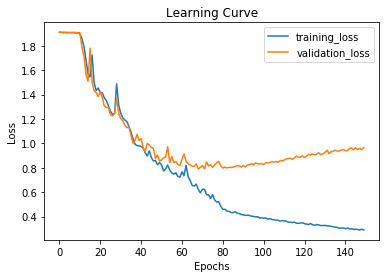

In [35]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

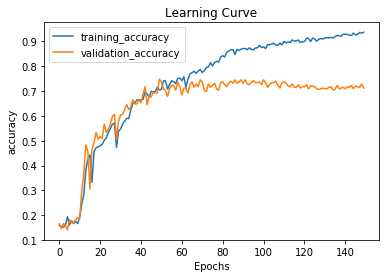

In [36]:
training_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [37]:
from keras.models import Model, load_model
model1_name = "3DCNN+LSTM_1_64_6_jester"
model1_path = os.path.join(save_dir, model1_name)
model1 = load_model(model1_path)


In [25]:
test_pred =model1.predict(X_train_new[50:70])
result = np.argmax(test_pred, axis =1)
print(result)

[1 2 3 1 1 1 4 0 2 1 1 3 1 4 4 2 4 4 0 0]


In [26]:
img_array = X_train_new[50]

In [27]:

plt.imshow(img_array[0,:,:,9])


IndexError: index 9 is out of bounds for axis 3 with size 3

In [ ]:
#np.argmax(y_val_new[0:20],axis =1)

In [38]:
from sklearn.metrics import confusion_matrix
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model1.predict(X_val_new),axis =1))
print(met)

[[42 15  2  0  1  0]
 [30 32  4  1  3  1]
 [ 2  0 45  3  2  4]
 [ 2  0  3 45  0  3]
 [ 1  2  4  2 52  1]
 [ 1  0  3  0  1 53]]


In [39]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=True, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

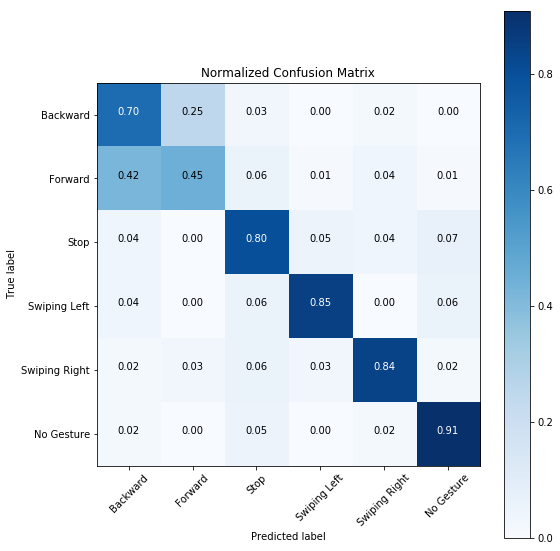

In [40]:
confusion_matrix_plot(met, classes=['Backward', 'Forward', 'Stop', 'Swiping Left', 'Swiping Right','No Gesture'])

In [61]:
from keras.models import Model, load_model
model2_name = "3DCNN_HRN_224_5"
model2_path = os.path.join(save_dir, model2_name)
model2 = load_model(model2_path)

In [64]:
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model1.predict(X_val_new)+model2.predict(X_val_new),axis =1))
print(met)

[[26  5  0  0  4]
 [ 0 24  0  0  0]
 [ 0  0 14  9  1]
 [ 1  0 10  9  1]
 [ 0  0  0  1 16]]
